# Lab 6

## Choosing among parameters when clustering

### At the end of this lab, I should be able to
* Formulate your own clustering questions and understand how you can go about getting answers
* Understand how to select a clustering algorithm for your task

**Note:** Exercises can be autograded and count towards your lab and assignment score. Problems are graded for participation.

## Video Overview
https://calpoly.zoom.us/rec/share/4GVIdxKEzA-af-wakibjPf8A27PSuWRMyCqehVx_fIhgj3wSt4CVJAq8z5KD8rT4.qy7mebr-OhR2-Vc9?startTime=1646517020000

In [76]:
from pathlib import Path
home = str(Path.home()) # all other paths are relative to this path. change to something else if this is not the case on your system
REPO = f"{home}/csc-466-student"
LAB = "Lab6"

In [77]:
#### NO NEED TO EDIT ####
%load_ext autoreload
%autoreload 2

from importlib import import_module
helper = import_module(f'{LAB}_helper')
#### NO NEED TO EDIT ####

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
import numpy as np

## Our data
We will be using a well known housing dataset from Boston.
<pre>
The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.

 Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
</pre>

In [79]:
import pandas as pd
df = pd.read_csv(f"{REPO}/data/housing/boston_fixed.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**Problem 1.** Read the descriptions of the features above, and come up with 2-3 reasonable questions with corresponding methods to test them. The only one that you cannot write, is the one I write below:

Example questions: 
* Are there any definitive subgroupings (i.e., clusters) of towns in the dataset? 
* How many (if any) groups/clusters are there in the dataset?
* Are there any clusters of median value of owner-occupied homes? And if so, can we use the rest of the data to predict these clusters? 

Methodology:
1. Empirically determine the best clustering method from our known list of kmeans and hiearchical clustering.
2. Using this best clustering model, visualize the data using PCA
3. Apply clustering algorithms to MEDV and then use random forest to predict these clusters presenting the evaluation.

**Upload your solution to Canvas.**

Overall question: Are there any clusters of towns? 

Use the following methodology:

1. Empirically determine the best clustering method from our known list kmeans and hiearchical clustering
2. Using this best clustering, visualize the data using PCA

**Exercise 1** A lot of methods depend on the scaling of data, so we need to decide on a scaling method. We will use the autoscaling method described in sklearn as:
"The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False." - <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html">Source</a>

For this exercise, scale ``df`` using the StandardScaler in sklearn. For consistency with later code, call this new scaled dataframe ``X``.

In [80]:
X = helper.scale(df)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,-0.014454
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,-0.210362
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,0.148802
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,-0.057989


In [81]:
!pytest -vv --diff-symbols {REPO}/tests/test_{LAB}.py::test_exercise_1

============================= test session starts ==============================
platform linux -- Python 3.9.7, pytest-7.4.0, pluggy-1.2.0 -- /opt/tljh/user/bin/python3.9
cachedir: .pytest_cache
rootdir: /home/jupyter-pander14/csc-466-instructor
plugins: clarity-1.0.1, anyio-3.7.0
collected 1 item                                                               

../tests/test_Lab6.py::test_exercise_1 PASSED                            [100%]

============================== 1 passed in 0.51s ===============================


**Exercise 2** We now need to take a look at our data, but it is too many dimensions! For this task we need to reduce the dimension. Reduce the dataset down to two dimensions using PCA. <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">Here is a link to the documentation.</a> Store the transformed data in a variable called ``X_pca``.

,PC1 (0.47),PC2 (0.12)
0,-2.087344,0.492851
1,-1.373382,-0.170924
2,-2.376553,0.914030
3,-2.837779,0.194873
4,-2.772915,0.433303
...,...,...
501,-0.302820,0.142757
502,-0.043395,-0.115690
503,-0.368190,0.823161
504,-0.264317,0.540015


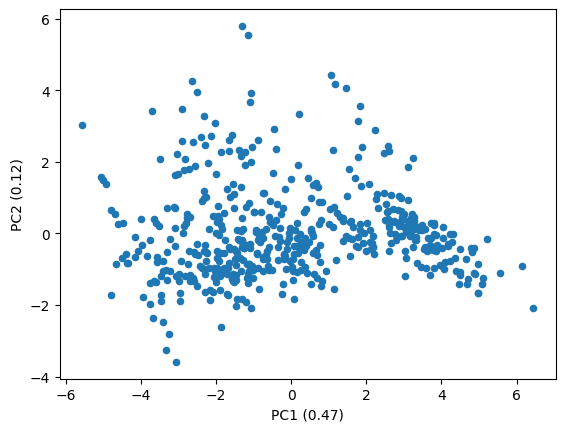

In [82]:
X_pca = helper.pca(X)
display(X_pca)
X_pca.plot.scatter(x=X_pca.columns[0],y=X_pca.columns[1]);

In [83]:
!pytest -vv --diff-symbols {REPO}/tests/test_{LAB}.py::test_exercise_2

============================= test session starts ==============================
platform linux -- Python 3.9.7, pytest-7.4.0, pluggy-1.2.0 -- /opt/tljh/user/bin/python3.9
cachedir: .pytest_cache
rootdir: /home/jupyter-pander14/csc-466-instructor
plugins: clarity-1.0.1, anyio-3.7.0
collected 1 item                                                               

../tests/test_Lab6.py::test_exercise_2 PASSED                            [100%]

============================== 1 passed in 0.54s ===============================


**Exercise 3** Our next major step is to apply kmeans to our data ``X`` (do NOT cluster on ``X_pca``) for several different values of ``k``. We'll compare these results later. The documentation for kmeans is <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html">here</a>. Fill in the loop that constructs the kmeans models for each of the values of ``k`` specified below.

In [84]:
kmeans_models = helper.kmeans(X,range_n_clusters = [2, 3, 4, 5, 6],random_state=10)
kmeans_models

{2: KMeans(n_clusters=2, random_state=10),
 3: KMeans(n_clusters=3, random_state=10),
 4: KMeans(n_clusters=4, random_state=10),
 5: KMeans(n_clusters=5, random_state=10),
 6: KMeans(n_clusters=6, random_state=10)}

In [85]:
!pytest -vv --diff-symbols {REPO}/tests/test_{LAB}.py::test_exercise_3

============================= test session starts ==============================
platform linux -- Python 3.9.7, pytest-7.4.0, pluggy-1.2.0 -- /opt/tljh/user/bin/python3.9
cachedir: .pytest_cache
rootdir: /home/jupyter-pander14/csc-466-instructor
plugins: clarity-1.0.1, anyio-3.7.0
collected 1 item                                                               

../tests/test_Lab6.py::test_exercise_3 PASSED                            [100%]

=============================== warnings summary ===============================
tests/test_Lab6.py::test_exercise_3
tests/test_Lab6.py::test_exercise_3
tests/test_Lab6.py::test_exercise_3
tests/test_Lab6.py::test_exercise_3
tests/test_Lab6.py::test_exercise_3
  /opt/tljh/user/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
    warnings.warn(

-- Docs: https://docs.pytest.org/en/stable/how-to/cap

**Exercise 4** Now we need assign cluster labels to each sample in our dataset. Fill in the following to accomplish this:

In [86]:
cluster_labels = helper.assign_labels(X,kmeans_models)
cluster_labels

,2,3,4,5,6
0,1,2,1,1,4
1,1,2,3,1,4
2,1,2,1,1,0
3,1,0,0,1,0
4,1,0,1,1,0
...,...,...,...,...,...
501,1,2,3,1,4
502,1,2,3,1,4
503,1,2,3,1,4
504,1,2,3,1,4


In [87]:
!pytest -vv --diff-symbols {REPO}/tests/test_{LAB}.py::test_exercise_4

============================= test session starts ==============================
platform linux -- Python 3.9.7, pytest-7.4.0, pluggy-1.2.0 -- /opt/tljh/user/bin/python3.9
cachedir: .pytest_cache
rootdir: /home/jupyter-pander14/csc-466-instructor
plugins: clarity-1.0.1, anyio-3.7.0
collected 1 item                                                               

../tests/test_Lab6.py::test_exercise_4 PASSED                            [100%]

=============================== warnings summary ===============================
tests/test_Lab6.py::test_exercise_4
tests/test_Lab6.py::test_exercise_4
tests/test_Lab6.py::test_exercise_4
tests/test_Lab6.py::test_exercise_4
tests/test_Lab6.py::test_exercise_4
  /opt/tljh/user/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
    warnings.warn(

-- Docs: https://docs.pytest.org/en/stable/how-to/cap

We now have 5 different clusterings of our data. We need to know which one of these is the best. Let's visualize the clusters (k=2 and k=3) using the cluster_labels and PCA. <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html">Here is some documentation on how to set the color.</a>

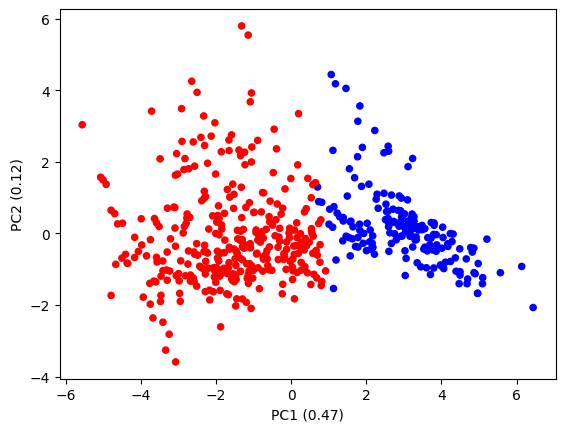

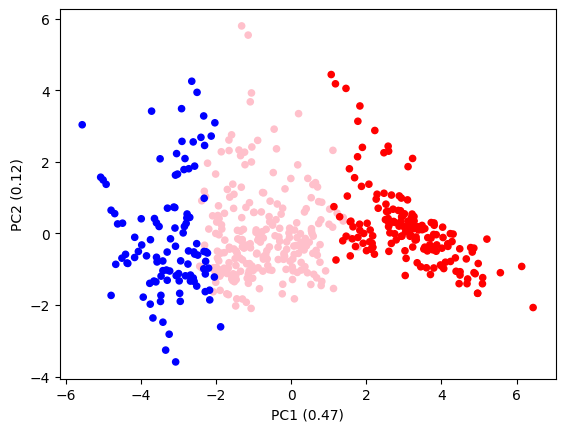

In [88]:
colorings = {}
colorings[2] = cluster_labels[2].map({0: "Blue", 1: "Red"}) # This is a new pandas command for us that maps all 0 values to Blue, etc
colorings[3] = cluster_labels[3].map({0: "Blue", 1: "Red",2: "Pink"}) # This is a new pandas command for us that maps all 0 values to Blue, etc
X_pca.plot.scatter(x=X_pca.columns[0],y=X_pca.columns[1],c=colorings[2])
X_pca.plot.scatter(x=X_pca.columns[0],y=X_pca.columns[1],c=colorings[3])
colorings = {}
colorings[2] = cluster_labels[2].map({0: "Blue", 1: "Red"}) # This is a new pandas command for us that maps all 0 values to Blue, etc
colorings[3] = cluster_labels[3].map({0: "Blue", 1: "Red",2: "Pink"}) # This is a new pandas command for us that maps all 0 values to Blue, etc

### Choosing a $k$
We will now start assembling information we need to make a decision. There are many ways to evaluate clusters, but one of the best ways is through a silhouette score. Here is an excerpt of the documentation from sklearn:
"Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster." - <a href="https://scikit-learn.org/dev/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#example-cluster-plot-kmeans-silhouette-analysis-py">Source</a>

In [89]:
# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
from sklearn.metrics import silhouette_score

n_clusters = 2
silhouette_avg = silhouette_score(X, cluster_labels[n_clusters])
print("For n_clusters =", n_clusters,
      "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.35010701730151716


The following is pulled directly from https://en.wikipedia.org/wiki/Silhouette_(clustering).

For data point $i\in C_{i}$ (data point $i$ in the cluster $C_{i}$), let

${\displaystyle a(i)={\frac {1}{|C_{i}|-1}}\sum _{j\in C_{i},i\neq j}d(i,j)}$

be the mean distance between ${\displaystyle i}$ and all other data points in the same cluster, where ${\displaystyle d(i,j)}$ is the distance between data points ${\displaystyle i}$ and ${\displaystyle j}$ in the cluster ${\displaystyle C_{i}}$ (we divide by ${\displaystyle |C_{i}|-1}$ because we do not include the distance ${\displaystyle d(i,i)}$ in the sum). We can interpret ${\displaystyle a(i)}$ as a measure of how well ${\displaystyle i}$ is assigned to its cluster (the smaller the value, the better the assignment).

We then define the mean dissimilarity of point ${\displaystyle i}$ to some cluster ${\displaystyle C_{k}}$ as the mean of the distance from ${\displaystyle i}$ to all points in ${\displaystyle C_{k}}$ (where ${\displaystyle C_{k}\neq C_{i}}$).

For each data point ${\displaystyle i\in C_{i}}$, we now define

${\displaystyle b(i)=\min _{k\neq i}{\frac {1}{|C_{k}|}}\sum _{j\in C_{k}}d(i,j)}$

to be the smallest (hence the ${\displaystyle \min }$  operator in the formula) mean distance of ${\displaystyle i}$ to all points in any other cluster, of which ${\displaystyle i}$ is not a member. The cluster with this smallest mean dissimilarity is said to be the "neighboring cluster" of ${\displaystyle i}$ because it is the next best fit cluster for point ${\displaystyle i}$.

We now define a silhouette (value) of one data point ${\displaystyle i}$

${\displaystyle s(i)={\frac {b(i)-a(i)}{\max\{a(i),b(i)\}}}}$, if ${\displaystyle |C_{i}|>1}$
and ${\displaystyle s(i)=0}$, if ${\displaystyle |C_{i}|=1}$

Which can be also written as:

${\displaystyle s(i)={\begin{cases}1-a(i)/b(i),&{\mbox{if }}a(i)<b(i)\\0,&{\mbox{if }}a(i)=b(i)\\b(i)/a(i)-1,&{\mbox{if }}a(i)>b(i)\\\end{cases}}}$
From the above definition it is clear that

${\displaystyle -1\leq s(i)\leq 1}$


**Exercise 5** Write your own silhouette_scores function that returns $s(i)$ for each sample.

In [90]:
scores = helper.silhouette_scores(X,cluster_labels[n_clusters])
scores[:10]

First 10 a's
[3.20052455 2.91288626 3.27192086 3.36930407 3.43471497 3.0672946
 3.13133632 3.66101868 4.70671512 3.57772466]
First 10 b's
[6.18942799 5.63092726 6.41889978 6.83694422 6.81389289 6.39033274
 5.5720741  5.58905379 5.720928   5.56577462]
First 10 a's
[3.20052455 2.91288626 3.27192086 3.36930407 3.43471497 3.0672946
 3.13133632 3.66101868 4.70671512 3.57772466]
First 10 b's
[6.18942799 5.63092726 6.41889978 6.83694422 6.81389289 6.39033274
 5.5720741  5.58905379 5.720928   5.56577462]


array([0.48290463, 0.48269865, 0.49026765, 0.50719152, 0.49592472,
       0.52001019, 0.43803039, 0.34496628, 0.17728118, 0.35719196])

In [91]:
np.mean(scores) # do you match the sklearn implementation?

0.3501070173015171

In [92]:
!pytest -vv --diff-symbols {REPO}/tests/test_{LAB}.py::test_exercise_5

============================= test session starts ==============================
platform linux -- Python 3.9.7, pytest-7.4.0, pluggy-1.2.0 -- /opt/tljh/user/bin/python3.9
cachedir: .pytest_cache
rootdir: /home/jupyter-pander14/csc-466-instructor
plugins: clarity-1.0.1, anyio-3.7.0
collected 1 item                                                               

../tests/test_Lab6.py::test_exercise_5 PASSED                            [100%]

=============================== warnings summary ===============================
tests/test_Lab6.py::test_exercise_5
tests/test_Lab6.py::test_exercise_5
tests/test_Lab6.py::test_exercise_5
tests/test_Lab6.py::test_exercise_5
tests/test_Lab6.py::test_exercise_5
  /opt/tljh/user/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
    warnings.warn(

-- Docs: https://docs.pytest.org/en/stable/how-to/cap

### Creating our plots
Let's put it all together and grab the scores for each cluster. I'll take over the plotting here. 

In [93]:
s_df = pd.DataFrame(index=X.index,columns=cluster_labels.columns)
for k in s_df.columns:
    s_df.loc[:,k] = helper.silhouette_scores(X,cluster_labels[k])
s_df

First 10 a's
[3.20052455 2.91288626 3.27192086 3.36930407 3.43471497 3.0672946
 3.13133632 3.66101868 4.70671512 3.57772466]
First 10 b's
[6.18942799 5.63092726 6.41889978 6.83694422 6.81389289 6.39033274
 5.5720741  5.58905379 5.720928   5.56577462]
First 10 a's
[3.12603639 2.50389049 3.24957062 3.40228949 3.47658634 2.96912797
 2.86498117 3.32544687 4.22433515 3.23508713]
First 10 b's
[3.5176056  3.9122071  3.49400403 3.46318962 3.51899007 3.49525004
 3.80217626 4.42353543 5.71401721 4.3690779 ]
First 10 a's
[3.65403272 2.42704989 3.23129228 3.27833338 3.6231466  2.99528427
 2.82420673 3.2768052  4.04122288 3.13800348]
First 10 b's
[3.21828447 3.6419826  3.38247672 3.58277663 3.39623814 3.22679601
 3.46428618 4.20678603 5.40252134 4.02579731]
First 10 a's
[2.91214259 2.2088979  3.02671552 3.17775992 3.26444403 2.63500777
 2.61697836 3.15781175 4.05938016 3.012912  ]
First 10 b's
[3.47203823 3.88824579 3.66879286 3.42928782 3.56079317 3.45337065
 3.6486414  4.35772788 5.31327263 4.194

,2,3,4,5,6
0,0.482905,0.111317,-0.119251,0.161258,0.151266
1,0.482699,0.35998,0.333591,0.431904,0.426417
2,0.490268,0.069958,0.044696,0.175011,-0.001211
3,0.507192,0.017585,0.084974,0.073347,-0.11653
4,0.495925,0.01205,-0.062627,0.083226,-0.048251
...,...,...,...,...,...
501,0.308273,0.403986,0.389445,0.41926,0.341606
502,0.275853,0.434986,0.442088,0.404744,0.318094
503,0.274321,0.34967,0.251841,0.351757,0.24415
504,0.276608,0.378565,0.315943,0.370383,0.28131


In [94]:
s_df.index.name="i"
s_df = s_df.reset_index()
s_df

,i,2,3,4,5,6
0,0,0.482905,0.111317,-0.119251,0.161258,0.151266
1,1,0.482699,0.35998,0.333591,0.431904,0.426417
2,2,0.490268,0.069958,0.044696,0.175011,-0.001211
3,3,0.507192,0.017585,0.084974,0.073347,-0.11653
4,4,0.495925,0.01205,-0.062627,0.083226,-0.048251
...,...,...,...,...,...,...
501,501,0.308273,0.403986,0.389445,0.41926,0.341606
502,502,0.275853,0.434986,0.442088,0.404744,0.318094
503,503,0.274321,0.34967,0.251841,0.351757,0.24415
504,504,0.276608,0.378565,0.315943,0.370383,0.28131


In [95]:
source = s_df.melt(id_vars=["i"])
source.columns = ["i","k","s"]

import altair as alt
alt.renderers.enable('mimetype')
alt.Chart(source).mark_bar().encode(
    x = "s:Q",
    y = alt.Y("i:N",sort='x',axis=alt.Axis(labels=False)),
    row = "k:N",
    color = "k:N"
).resolve_scale(y='independent').properties(height=200)

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


#### Problem 2: What are the average silhouttee scores for each value of $k$? Can you relate this average value to what you are seeing in the above plot? What kind of shape are we looking for?

**Upload your solution to Canvas.**

## Hiearchical Clustering

From here on out there are several problems and only one exercise.

**Problem 3:** That was kmeans clustering. What about hiearchical clustering? For this excercise, use the same ``X`` data and create a dendrogram using hiearchical clustering. <a href="https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html">Here is a link to a sample</a>. After you dig into this code, answer what kind of linkage method was used (answer with more than just the name)?

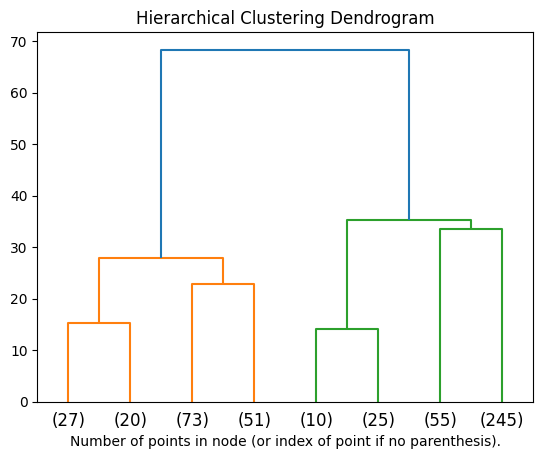

In [96]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0,n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=2)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

#

**Upload your solution to Canvas.**

**Problem 4** Now change the linkage method to single linkage, and compare the plots. Are they better or worse?

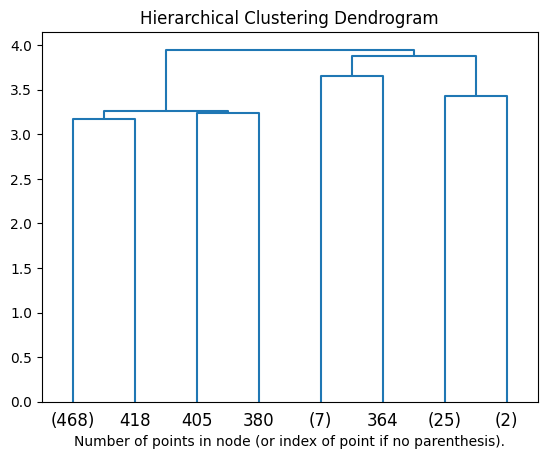

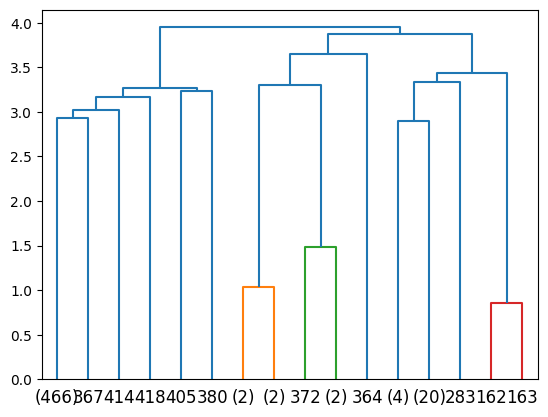

In [97]:
#

**Upload your solution to Canvas.**

### Clustering a single column to produce buckets

Now we are going to switch gears and cluster the ``MEDV`` column. First, we will create a density plot of ``MEDV``. Make sure you go back to the original dataframe ``df`` at this point.

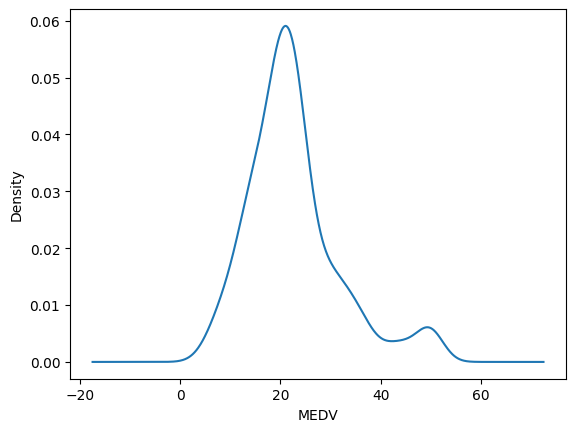

In [98]:
ax = df["MEDV"].plot.density();
ax.set_xlabel('MEDV');

**Exercise 6** To me it looks reasonable that there might be 3 clusters as we have the shoulder sticking out around 30 and the bump at around 50. Using kmeans and k=3, group each town in one of three clusters using the algorithm. 

In [99]:
clusterer = helper.bin_x(df[["MEDV"]])
labels = clusterer.predict(df[["MEDV"]])
df["y"] = labels
display(df)
df.groupby("y").MEDV.mean()

First 10 a's
[3.20052455 2.91288626 3.27192086 3.36930407 3.43471497 3.0672946
 3.13133632 3.66101868 4.70671512 3.57772466]
First 10 b's
[6.18942799 5.63092726 6.41889978 6.83694422 6.81389289 6.39033274
 5.5720741  5.58905379 5.720928   5.56577462]


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,2
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,2
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,2
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,2
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,2
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,2


y
0    39.906757
1    13.463333
2    22.797872
Name: MEDV, dtype: float64

In [100]:
!pytest -vv --diff-symbols {REPO}/tests/test_{LAB}.py::test_exercise_6

============================= test session starts ==============================
platform linux -- Python 3.9.7, pytest-7.4.0, pluggy-1.2.0 -- /opt/tljh/user/bin/python3.9
cachedir: .pytest_cache
rootdir: /home/jupyter-pander14/csc-466-instructor
plugins: clarity-1.0.1, anyio-3.7.0
collected 1 item                                                               

../tests/test_Lab6.py::test_exercise_6 PASSED                            [100%]

=============================== warnings summary ===============================
tests/test_Lab6.py::test_exercise_6
tests/test_Lab6.py::test_exercise_6
tests/test_Lab6.py::test_exercise_6
tests/test_Lab6.py::test_exercise_6
tests/test_Lab6.py::test_exercise_6
tests/test_Lab6.py::test_exercise_6
  /opt/tljh/user/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
    warnings.warn(

-- Docs: https://

In [101]:
# Good job!
# Don't forget to push with ./submit.sh

#### Having trouble with the test cases and the autograder?

You can always load up the answers for the autograder. The autograder runs your code and compares your answer to the expected answer. I manually review your code, so there is no need to hide this from you.

```python
import joblib
answers = joblib.load(f"{home}/csc-466-student/tests/answers_Lab6.joblib")
answers.keys()
```